In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from qbstyles import mpl_style

from drawdata import ScatterWidget

mpl_style()

In [24]:
def model_line(model, X, y, color_dp3d="black", color_dp2d="red", color_line2d="white", color_line3d="white", alpha=0.5):
    if X.shape[1] == 1:  # 2D Case
        plt.scatter(X.iloc[:, 0], y, marker=".", color=color_dp2d, label="Data")
        y_pred = model.predict(X).flatten()
        plt.plot(X.iloc[:, 0], y_pred, color=color_line2d, label="Model Prediction")
        plt.xlabel(X.columns[0])
        plt.ylabel(Y.columns[0])
        plt.legend()
        plt.show()

    elif X.shape[1] == 2:  # 3D Case
        plt.ion()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], y, color=color_dp3d, label="Data", marker=".")

        X_vals = X.iloc[:, 0]
        Y_vals = X.iloc[:, 1]
        Z_vals = model.predict(X).flatten()
        ax.plot_trisurf(X_vals, Y_vals, Z_vals, color=color_line3d, alpha=alpha)

        ax.set_xlabel(X.columns[0])
        ax.set_ylabel(X.columns[1])
        ax.set_zlabel(y.name)
        plt.legend()
        plt.show()

    else:
        raise ValueError("Only 1D or 2D features are supported.")


def predictor_line(model, X, y, dot_color="yellow", line_color="cyan", marker="."):
    pred = model.predict(X).flatten()
    y_true = y.to_numpy().flatten()
    start = min(y_true.min(), pred.min())
    end = max(y_true.max(), pred.max())
    line = np.linspace(start, end, 100)

    plt.scatter(y_true, pred, marker=marker, color=dot_color)
    plt.plot(line, line, color=line_color)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()


def model_equation(model, feature_names, target_label, variable_as_name=False):
    weights = model.get_weights()
    coef = weights[0].flatten()
    intercept = weights[1][0]

    if variable_as_name:
        variables = [f"{name}" for name in feature_names]
        y = target_label
    else:
        variables = [f"x{i}" for i in range(1, len(feature_names) + 1)]
        y = "y"
        for variable, feature_name in zip(variables, feature_names):
            print(f"{variable} = {feature_name}")
        print(f"{y} = {target_label}")
    
    terms = [f"{coef[i]:.2f} * {variables[i]}" for i in range(len(coef))]
    equation = f"{y} = {terms[0]}"
    for term in terms[1:]:
        if term.startswith('-'):
            equation += f" - {term[1:]}"
        else:
            equation += f" + {term}"
    equation += f" + {intercept:.2f}" if intercept >= 0 else f" - {-intercept:.2f}"
    return equation


def loss_curve(history, color="blue"):
    plt.plot(history.history['loss'], color=color, label='Training Loss')
    plt.title('Model Loss Curve')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

In [3]:
widget = ScatterWidget()

In [4]:
widget

ScatterWidget()

In [5]:
df = widget.data_as_pandas

In [23]:
df

,x,y,color,label
0,5.592645,430.271185,#1f77b4,a
1,10.900883,444.931990,#1f77b4,a
2,28.687817,407.064880,#1f77b4,a
3,32.461741,432.733686,#1f77b4,a
4,12.027809,400.041015,#1f77b4,a
...,...,...,...,...
226,634.209850,451.892497,#1f77b4,a
227,647.600605,435.188945,#1f77b4,a
228,641.465584,436.336833,#1f77b4,a
229,633.098732,422.158878,#1f77b4,a


<Axes: xlabel='x', ylabel='y'>

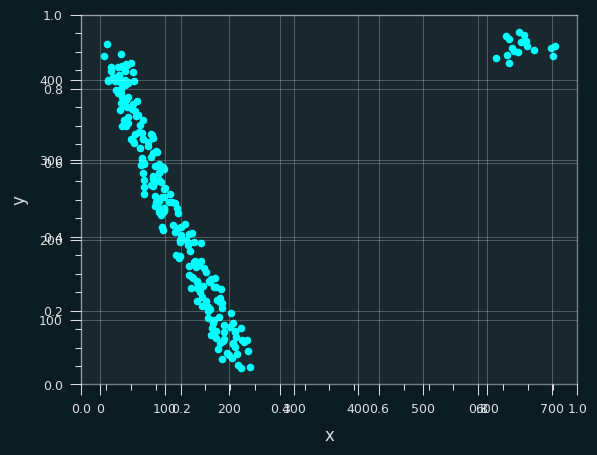

In [7]:
df.plot.scatter('x', 'y', color="cyan")

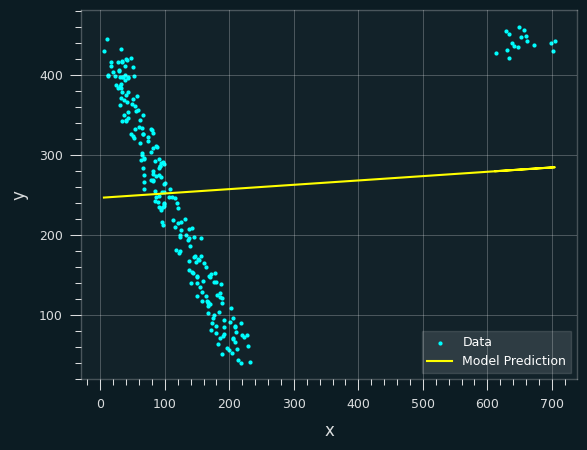

In [8]:
X = df[['x']]
y = df['y']

sklearn_model = LinearRegression()
sklearn_model.fit(X, y)

model_line(sklearn_model, X, y, color_dp2d="cyan", color_line2d="yellow")

In [110]:
X = df[["x"]]
Y = df[["y"]]

keras_model = Sequential([
    Input(shape=(1,)),
    Dense(units=1, activation="linear")
], name="keras_model")

keras_model.compile(loss="mse", optimizer=Adam(learning_rate=0.5))
keras_model.summary()

Model: "keras_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [115]:
history = keras_model.fit(X, Y, batch_size=16, epochs=35)

Epoch 1/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18463.5918
Epoch 2/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 20683.9785
Epoch 3/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 17333.0039 
Epoch 4/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19259.9297
Epoch 5/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15443.2168
Epoch 6/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17515.2285
Epoch 7/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16289.1914 
Epoch 8/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15963.6670 
Epoch 9/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16542.2852
Epoch 10/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16868.0469 
Epoch 11/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 17085.9160
Epoch 12/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16319.3057
Epoch 13/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 14493.3154
Epoch 14/35
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15468.7773
Epoch 15/35
15/15 ━━━

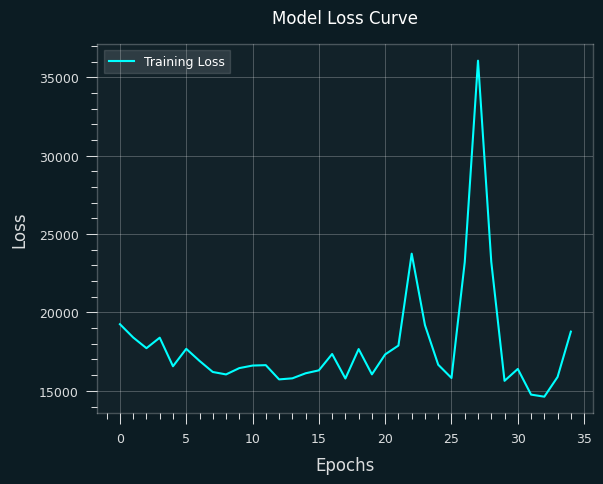

In [116]:
loss_curve(history, "cyan")

In [117]:
sklearn_mse = mean_squared_error(Y, sklearn_model.predict(X))
keras_mse = mean_squared_error(Y, keras_model.predict(X))

print(f"MSE of sklearn: {sklearn_mse:,.2f}")
print(f"MSE of keras: {keras_mse:,.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MSE of sklearn: 14,708.01
MSE of keras: 14,894.91


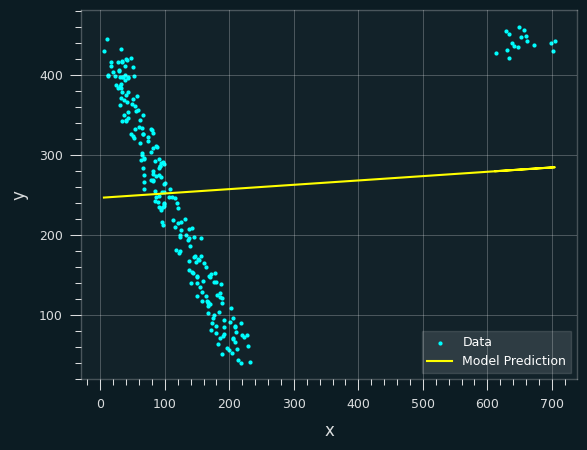

In [124]:
model_line(sklearn_model, X, y, color_dp2d="cyan", color_line2d="yellow")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


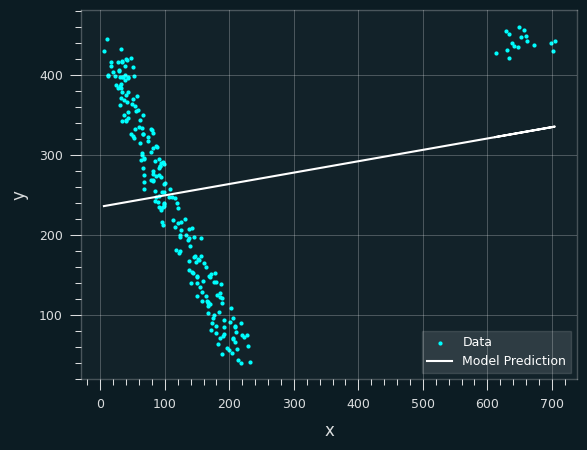

In [123]:
model_line(keras_model, X, Y, color_dp2d="cyan")